In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Covid19india.csv")
df.head()

D:\Apps\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,2,3,2020


In [3]:
df = df.iloc[:,1:]
df.head(2)

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,2,2,2020


## inspect null values in each columns 

In [4]:
df.isnull().sum().sort_values(ascending = False)/len(df)*100

Detected City        92.492921
Age Bracket          58.852649
Gender               56.936283
Detected District     5.758010
Detected State        0.006171
State code            0.006171
Num Cases             0.002057
Current Status        0.001371
Date Announced        0.000000
Day                   0.000000
Month                 0.000000
Year                  0.000000
dtype: float64

In [5]:
df.columns

Index(['Num Cases', 'Date Announced', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Day', 'Month', 'Year'],
      dtype='object')

In [6]:
df.groupby("Month")['Num Cases'].sum()

Month
1         1.0
2         2.0
3      1635.0
4     36078.0
5    242853.0
6    663178.0
7    270185.0
Name: Num Cases, dtype: float64

In [7]:
M = df[df['Current Status'] == "Hospitalized"].groupby("Month")['Num Cases'].sum()
M

Month
3      1431.0
4     33209.0
5    155781.0
6    395144.0
7    157701.0
Name: Num Cases, dtype: float64

In [8]:
import matplotlib.pyplot as plt

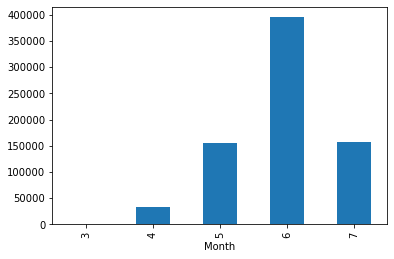

In [9]:
M.plot.bar()
plt.show()

In [10]:
df.columns

Index(['Num Cases', 'Date Announced', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Day', 'Month', 'Year'],
      dtype='object')

### total male/female infected with covid

In [11]:
df.groupby('Gender')["Num Cases"].sum()

Gender
F             21294.0
M             42795.0
M                 1.0
Non-Binary       12.0
Name: Num Cases, dtype: float64

### what age group is infected the most?

In [12]:
R = df.groupby("Age Bracket")["Num Cases"].sum().sort_values(ascending = False)
R

Age Bracket
30.0       1209.0
40.0       1027.0
25.0       1015.0
35.0        992.0
32.0        936.0
            ...  
97.0          1.0
96.0          1.0
95.0          1.0
9 Month       1.0
99.0          1.0
Name: Num Cases, Length: 325, dtype: float64

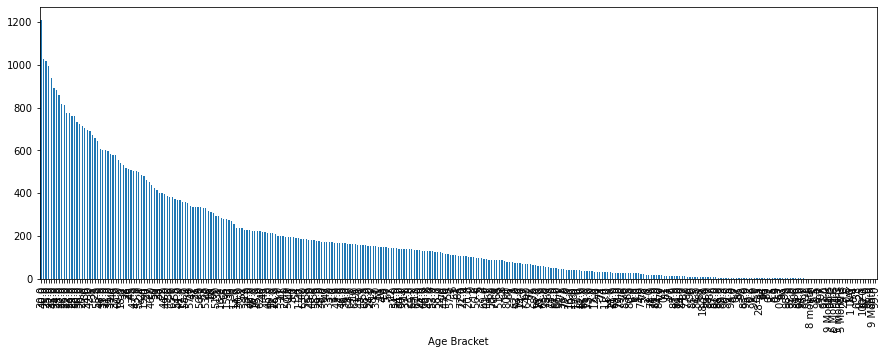

In [13]:
R.plot.bar(figsize = (15,5))
plt.show()

In [14]:
df.columns

Index(['Num Cases', 'Date Announced', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Day', 'Month', 'Year'],
      dtype='object')

In [24]:
statewise = df[df['Current Status']=="Hospitalized"].groupby('Detected State')['Num Cases'].sum().sort_values(ascending = False)
statewise

Detected State
Maharashtra                                 217107.0
Tamil Nadu                                  118587.0
Delhi                                       102827.0
Gujarat                                      37631.0
Uttar Pradesh                                29959.0
Telangana                                    27610.0
Karnataka                                    26743.0
West Bengal                                  23831.0
Rajasthan                                    21400.0
Andhra Pradesh                               21195.0
Haryana                                      17987.0
Madhya Pradesh                               15625.0
Assam                                        13337.0
Bihar                                        12524.0
Odisha                                       10096.0
Jammu and Kashmir                             8930.0
Punjab                                        6747.0
Kerala                                        5834.0
State Unassigned               

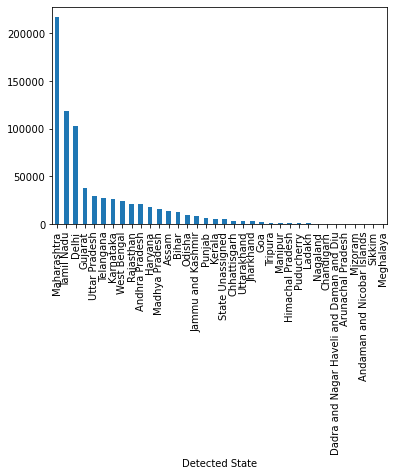

In [16]:
statewise.plot.bar()
plt.show()

In [17]:
df.columns

Index(['Num Cases', 'Date Announced', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Day', 'Month', 'Year'],
      dtype='object')

In [18]:
day = df[df['Current Status']=="Hospitalized"].groupby(['Month','Day'])[['Num Cases']].sum()
day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
7     3      22718.0
      4      24018.0
      5      23942.0
      6      22500.0
      7      23147.0

[124 rows x 1 columns]

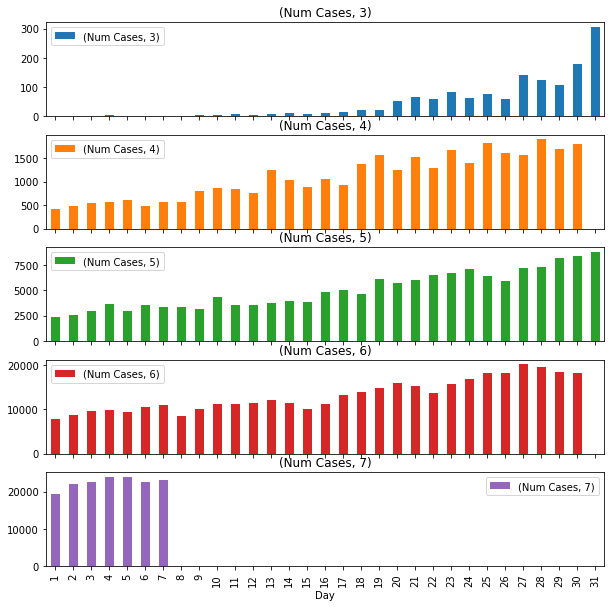

In [19]:
day.unstack(level = 0).plot(kind = 'bar',subplots = True,figsize =(10,10))
plt.show()

In [20]:
df["Current Status"].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan, 'Migrated_other'], dtype=object)

In [21]:
df[df["Current Status"]=='Deceased']["Num Cases"].sum()

19817.0

In [22]:
df[df["Current Status"]=='Deceased'].groupby("Detected State")["Num Cases"].sum().sort_values(ascending = False)

Detected State
Maharashtra                                 8919.0
Delhi                                       3112.0
Gujarat                                     1831.0
Tamil Nadu                                  1613.0
Uttar Pradesh                                798.0
West Bengal                                  787.0
Madhya Pradesh                               521.0
Rajasthan                                    432.0
Karnataka                                    409.0
Telangana                                    289.0
Haryana                                      276.0
Andhra Pradesh                               221.0
Punjab                                       159.0
Jammu and Kashmir                            138.0
Bihar                                         97.0
Odisha                                        54.0
Uttarakhand                                   43.0
Kerala                                        27.0
Jharkhand                                     19.0
Assam           